In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
x = df.drop('sales', axis=1)
y = df['sales']

In [ ]:

poly = PolynomialFeatures(degree=2 ,include_bias=False)

In [5]:
poly.fit(x)

PolynomialFeatures(include_bias=False)

In [6]:
poly_feature = poly.transform(x)

In [7]:
poly_feature.shape

(200, 9)

In [8]:
x.shape

(200, 3)

In [9]:
x.loc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [10]:
#2.301000e+02, 3.780000e+01, 6.920000e+01
# TV   330.1    radio  7.8   newspaper 69.2

# 8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03
# these are interaction terms which basecly are
#  Tv*radio tv*newspaper radio*newspaper and so on
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(poly_feature,y ,test_size=0.20, random_state=101)


In [12]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
test_pred = model.predict(x_test)
test_pred

array([14.00440879, 19.36204501, 12.28218671, 16.80182928,  7.83191151,
        6.83757622, 20.15051687, 17.50965665, 10.49436303, 20.1256467 ,
        9.47764924, 14.07348185, 12.02071483, 23.39397054, 19.62506939,
        9.10813091, 12.09032912,  9.17344473,  8.34642294, 21.67784068,
        6.95781569, 19.38615567, 27.27942858, 24.55447019,  8.91737876,
       11.78402434, 20.45934235,  9.13042283, 12.7074441 ,  8.64625848,
        8.63766834, 20.18942945, 10.86503266,  6.77029889, 18.28504172,
        9.40606229, 10.27562292,  9.56621784,  7.4158912 , 10.97067111])

In [14]:
model.coef_

array([ 5.28857442e-02,  1.66632005e-02,  1.44706371e-02, -1.12669173e-04,
        1.13270614e-03, -6.02100349e-05,  8.80211097e-05,  7.41831493e-05,
       -3.05994134e-05])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , root_mean_squared_error
MAE =mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = root_mean_squared_error(y_test,test_pred)

In [16]:
MAE

0.44310658314805346

In [17]:
RMSE

0.580945095290379

In [18]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [19]:
x.loc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [20]:
model.coef_

array([ 5.28857442e-02,  1.66632005e-02,  1.44706371e-02, -1.12669173e-04,
        1.13270614e-03, -6.02100349e-05,  8.80211097e-05,  7.41831493e-05,
       -3.05994134e-05])

In [21]:
# create the diferent order poly
# split poly feat train/test
#fit on train
#store/save the rmse for BOTH the train AND test
#PLOT the ruslts (error vs poly order)
import numpy as np

In [22]:
train_rmse_erros = []
test_rmse_erros = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d , include_bias=False)
    poly_feature = poly_converter.fit_transform(x)

    x_train,x_test,y_train,y_test = train_test_split(poly_feature,y ,test_size=0.20, random_state=101)

    model = LinearRegression()
    model.fit(x_train,y_train)
    
    train_pred = model.predict(x_train)
    test_pred =  model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train ,train_pred))
    test_rmse = root_mean_squared_error(y_test,test_pred)

    train_rmse_erros.append(train_rmse)
    test_rmse_erros.append(test_rmse)


    

In [23]:
train_rmse_erros

[np.float64(1.723054871233639),
 np.float64(0.617069105697675),
 np.float64(0.44677442227228625),
 np.float64(0.3645855353584905),
 np.float64(0.26626257260484454),
 np.float64(0.26706761171844606),
 np.float64(0.3092212226095793),
 np.float64(0.40416170808261703),
 np.float64(0.6095566101575618)]

In [24]:
test_rmse_erros

[1.43646052856369,
 0.580945095290379,
 0.5634213589090348,
 0.47691712474067843,
 0.3424859233222042,
 0.6631225227191913,
 2.2550958416797853,
 11.028822962721721,
 146.62518268106345]

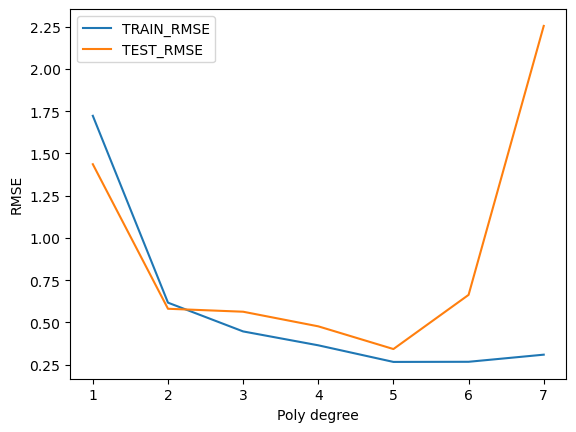

In [25]:
# it keep give you lower error on the training but not on the on testing 
# that maen it over fit it capture evry noise in the data .
# now the best fit is 5th dgree do you really want to go this far and risk to overfit 
# not necessary , you can chose 5th but for save choice you can choose lower dgree
plt.plot(range(1,8) , train_rmse_erros[:7] , label = 'TRAIN_RMSE')
plt.plot(range(1,8),test_rmse_erros[:7] , label = 'TEST_RMSE')
plt.xlabel('Poly degree')
plt.ylabel('RMSE')
plt.legend()

In [26]:
final_poly_coverter = PolynomialFeatures(degree=5 , include_bias=False)
Fmodel = LinearRegression()

In [ ]:
full_converted_x = final_poly_coverter.fit_transform(x)
Fmodel.fit(full_converted_x,y)


LinearRegression()

In [30]:
from joblib import dump,load


In [31]:
dump(Fmodel , 'Poly_Final_Model.joblib')
dump(final_poly_coverter,'final_poly_coverter.joblib')

['final_poly_coverter.joblib']

In [34]:
loaded_model = load('Poly_Final_Model.joblib')
loaded_converter = load('final_poly_coverter.joblib')

campaign = [[110,30,12]]

x = loaded_converter.fit_transform(campaign)
loaded_model.predict(x)

array([14.28616423])